In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from neural_exploration import *
sns.set()

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Using TensorFlow backend.
/home/sauxpa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sauxpa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sauxpa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sauxpa/anaconda3/lib/python3.7/site-packages/tenso

### Bandit settings

In [2]:
T = int(2e2)
n_arms = 4
n_features = 20
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 2

### NeuralUCB on linear rewards

In [3]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)

In [4]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=20,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      learning_rate=0.01,
                      batch_size=100,
                      epochs=5,
                      nn_verbose=0,
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)
    
    # when training multiple models sequentially,
    # flush them when you don't need them
    # otherwise they will stick around and pollute your RAM
    K.clear_session()

100%|██████████| 200/200 [00:17<00:00, 11.75it/s, total regret=379, % optimal arm=89.00%]


### Sublinear regret growth : the bandit problem is solved efficiently

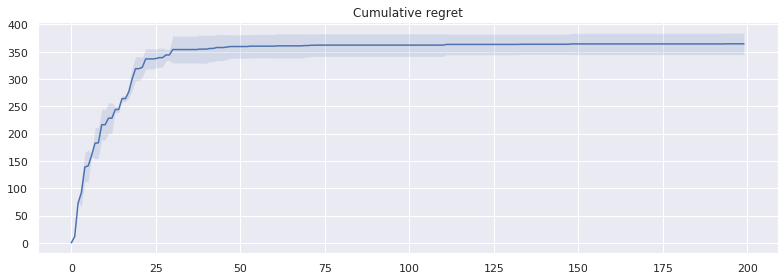

In [5]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

### NeuralUCB on nonlinear rewards

In [6]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)**2

In [9]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=20,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      learning_rate=0.01,
                      batch_size=100,
                      epochs=10,
                      nn_verbose=0,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)
    
    # when training multiple models sequentially,
    # flush them when you don't need them
    # otherwise they will stick around and pollute your RAM
    K.clear_session()

100%|██████████| 200/200 [00:19<00:00, 10.47it/s, total regret=914, % optimal arm=43.00%]


### Sublinear regret growth : the bandit problem is solved efficiently (even though the reward is nonlinear!)

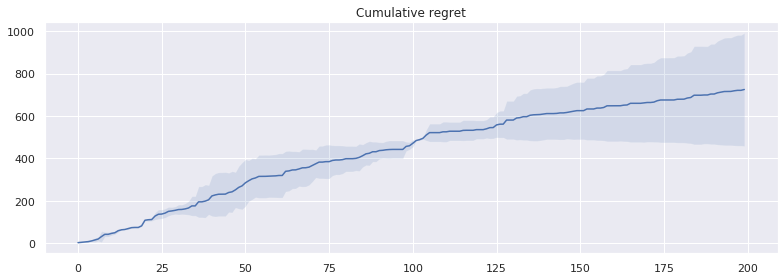

In [10]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()